In [1]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
from dataclasses import asdict, is_dataclass, dataclass
import os
import json
import pickle
from pandas.api.types import is_datetime64_any_dtype
import scipy
import numpy as np
from scipy.stats import linregress

from src.common.AssetData import AssetData
from src.common.AssetDataService import AssetDataService
from src.common.AssetFileInOut import AssetFileInOut 
from src.databaseService.OutsourceLoader import OutsourceLoader

from src.simulation.SimulatePortfolio import SimulatePortfolio
from src.strategy.StratBuyAndHold import StratBuyAndHold
from src.simulation.ResultAnalyzer import ResultAnalyzer
from src.common.AssetFileInOut import AssetFileInOut
from src.mathTools.CurveAnalysis import CurveAnalysis
from src.predictionModule.FourierML import FourierML
from src.common.YamlTickerInOut import YamlTickerInOut
from src.common.DataFrameTimeOperations import DataFrameTimeOperationsPandas as DFTO


In [3]:
import bisect
# Sorted array of real numbers
sorted_array = [1.1, 2.3, 3.7, 4.5, 6.8]
# The value of a
a = 7.2
# Find the index of the smallest number greater than a
index = bisect.bisect_right(sorted_array, a)
print(f"The index : {index}")

The index : 5


In [4]:
np.flipud(np.cos(( 2*np.arange(1, 5 + 2) - 1) * np.pi / (2 * (5+1))))

array([-0.96592583, -0.70710678, -0.25881905,  0.25881905,  0.70710678,
        0.96592583])

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
# Initialize MLP
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)

# Train
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


(112, 4)
(112,)
Accuracy: 0.9210526315789473


c:\Users\kimer\Desktop\RandomOdyssey\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
((np.power(2,range(0,10))-1)*(0.15/(2**9-1))).tolist()

[0.0,
 0.00029354207436399217,
 0.0008806262230919766,
 0.002054794520547945,
 0.004403131115459882,
 0.009099804305283758,
 0.018493150684931507,
 0.037279843444227,
 0.074853228962818,
 0.15]

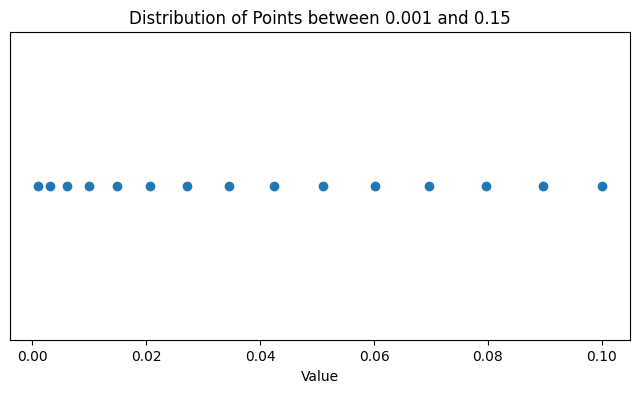

[0.0010128108731718146, 0.00302867869714807, 0.006028189562798407, 0.0099824565407872, 0.01485339787849419, 0.020594103748109886, 0.027149288013920816, 0.03445582066801904, 0.04244333580678849, 0.05103490929302295, 0.0601477995774181, 0.06969424454492273, 0.07958230671188203, 0.08971675863426365, 0.1]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points you want to generate
n = 15  # You can change this number as needed

# Generate Chebyshev nodes in the interval [-1, 1]
k = np.arange(1, n + 2)
x_k = np.cos(( 2*k - 1) * np.pi / (4 * (n+1)))

# Map the nodes to the interval [0.001, 0.15] with higher density near 0.001
a = 0.001  # Start of the interval
b = 0.10   # End of the interval
s = (b*(x_k[1:]-x_k[0])/(x_k[-1]-x_k[0])).tolist()
# Optional: Plot the distribution of the points
plt.figure(figsize=(8, 4))
plt.plot(s, np.zeros_like(s), 'o')
plt.title('Distribution of Points between 0.001 and 0.15')
plt.xlabel('Value')
plt.yticks([])
plt.show()

# Print the generated points
print(s)


In [8]:
dates = pd.date_range(pd.Timestamp(year=2010,month=1,day=4), pd.Timestamp(year=2020,month=1,day=4), freq='B')
spare_dates = pd.DatetimeIndex(np.random.choice(dates, size=int(len(dates)*0.1), replace=False)).sort_values()
spare_dates

DatetimeIndex(['2010-01-11', '2010-01-12', '2010-01-15', '2010-01-20',
               '2010-02-04', '2010-02-25', '2010-04-19', '2010-04-27',
               '2010-05-07', '2010-06-22',
               ...
               '2019-08-27', '2019-09-16', '2019-09-19', '2019-09-27',
               '2019-10-15', '2019-10-24', '2019-11-01', '2019-12-03',
               '2019-12-18', '2020-01-02'],
              dtype='datetime64[ns]', length=261, freq=None)

In [9]:
assets: dict[str, AssetData] = AssetFileInOut("../src/stockGroups/bin").loadDictFromFile("group_snp500_over20years")
current_date: pd.Timestamp = pd.Timestamp.now(tz='UTC')
analysis_results = []
for ticker, asset in assets.items():
    priceData: pd.DataFrame = asset.shareprice.iloc[-21*6:-1]["Close"]
    priceData = priceData.resample('B').mean().dropna()
    priceDataVal=priceData.values
    analysis_results.append(CurveAnalysis.lineFit(priceDataVal/priceDataVal[0], ticker))

res = pd.DataFrame(analysis_results)
res['Rankslope'] = res['Slope'].rank(ascending=False)
res['Rankvar'] = res['Variance'].rank(ascending=True)
res['Score'] = res['Rankslope'] + res['Rankvar']
res.sort_values(by='Score', ascending=True, inplace=True)

In [10]:
res

,Ticker,Slope,Intercept,R_Value,P_Value,Std_Err,Variance,Rankslope,Rankvar,Score
37,BLK,0.003034,0.965029,0.979658,1.180007e-87,0.000056,0.000507,25.0,16.0,41.0
180,MSI,0.002882,1.004407,0.978581,2.726816e-86,0.000055,0.000483,34.0,11.0,45.0
184,NI,0.002611,0.995103,0.979174,4.939502e-87,0.000049,0.000385,47.0,1.0,48.0
33,BK,0.003085,0.969534,0.976290,1.316015e-83,0.000062,0.000614,23.0,31.0,54.0
20,AON,0.003012,1.002241,0.975662,6.449355e-83,0.000061,0.000602,26.0,29.0,55.0
...,...,...,...,...,...,...,...,...,...,...
134,HUM,-0.002989,1.126083,-0.812160,1.451059e-30,0.000194,0.006050,390.0,365.0,755.0
94,EW,-0.002450,1.003459,-0.728717,5.834908e-22,0.000208,0.006955,386.0,374.0,760.0
388,WBA,-0.003638,0.935470,-0.837947,3.817665e-34,0.000214,0.007370,392.0,378.0,770.0
311,MU,-0.002354,0.977910,-0.667231,1.959523e-17,0.000237,0.009061,385.0,385.0,770.0


{'Ticker': 'ZBRA', 'Slope': np.float64(18.615246954805105), 'Intercept': np.float64(7561.517231770834), 'R_Value': np.float64(0.8682961419977793), 'P_Value': np.float64(2.9209850923546793e-39), 'Std_Err': np.float64(0.9588937367350466), 'Variance': np.float64(148438.10020857948)}
LinregressResult(slope=np.float64(18.615246954805105), intercept=np.float64(7561.517231770834), rvalue=np.float64(0.8682961419977793), pvalue=np.float64(2.9209850923546793e-39), stderr=np.float64(0.9588937367350466), intercept_stderr=np.float64(68.78684222078785))
7561.517231770834


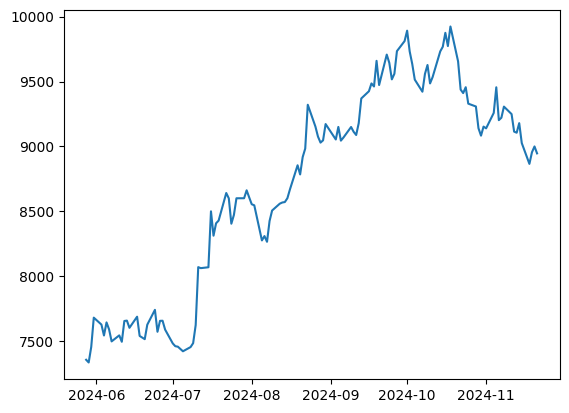

In [11]:
from scipy.stats import linregress
pdframe = assets["NVR"].shareprice.iloc[-21*6:-1]["Close"]
zeroval=pdframe.values[0]
plt.plot(pdframe)
a = CurveAnalysis.lineFit(pdframe.values, ticker)
print(a)
regression = linregress(np.arange(len(pdframe)), pdframe.values)
print(regression)
y_fit = regression.slope * np.arange(len(pdframe)) + regression.intercept
print(regression.intercept)

In [12]:
import polars as pl
from datetime import datetime, timedelta

# Generate sample data
start_date = datetime(2023, 1, 1)
data = {
    'timestamp': [start_date + timedelta(days=i) for i in range(10)],
    'price': [100 + i * 10 for i in range(10)]
}

priceData = pl.DataFrame(data)
print(priceData["price"].quantile(0.90))
print(type(priceData['price'].to_numpy()))

180.0
<class 'numpy.ndarray'>


In [13]:
print(pl.__version__)

1.14.0


In [14]:
# Resample to daily frequency and compute mean
resampled = priceData.group_by_dynamic(
    index_column='timestamp',
    every='1d',       # Window size of 1 day
    closed='left',    # Window is left-closed
    by=None           # No additional grouping
).agg([
    pl.col('price').mean().alias('price_mean')
]).drop_nulls()

print(resampled)

shape: (10, 2)
┌─────────────────────┬────────────┐
│ timestamp           ┆ price_mean │
│ ---                 ┆ ---        │
│ datetime[μs]        ┆ f64        │
╞═════════════════════╪════════════╡
│ 2023-01-01 00:00:00 ┆ 100.0      │
│ 2023-01-02 00:00:00 ┆ 110.0      │
│ 2023-01-03 00:00:00 ┆ 120.0      │
│ 2023-01-04 00:00:00 ┆ 130.0      │
│ 2023-01-05 00:00:00 ┆ 140.0      │
│ 2023-01-06 00:00:00 ┆ 150.0      │
│ 2023-01-07 00:00:00 ┆ 160.0      │
│ 2023-01-08 00:00:00 ┆ 170.0      │
│ 2023-01-09 00:00:00 ┆ 180.0      │
│ 2023-01-10 00:00:00 ┆ 190.0      │
└─────────────────────┴────────────┘


C:\Users\kimer\AppData\Local\Temp\ipykernel_2076\2642637582.py:2: DeprecationWarning: The argument `by` for `DataFrame.group_by_dynamic` is deprecated. It has been renamed to `group_by`.
  resampled = priceData.group_by_dynamic(


In [15]:
# Add a weekday column (0=Monday, 6=Sunday)
priceData = priceData.with_columns([
    pl.col('timestamp').dt.weekday().alias('weekday')
])

# Filter to include only business days (Monday=0 to Friday=4)
business_days = priceData.filter(pl.col('weekday').is_between(0, 4))

# Perform resampling on business days
resampled_business = business_days.group_by_dynamic(
    index_column='timestamp',
    every='1d',       # 1 day window
    closed='left'
).agg([
    pl.col('price').mean().alias('price_mean')
]).drop_nulls()

# Drop the auxiliary 'weekday' column if not needed
resampled_business = resampled_business.drop('weekday') if 'weekday' in resampled_business.columns else resampled_business

print(resampled_business)

shape: (6, 2)
┌─────────────────────┬────────────┐
│ timestamp           ┆ price_mean │
│ ---                 ┆ ---        │
│ datetime[μs]        ┆ f64        │
╞═════════════════════╪════════════╡
│ 2023-01-02 00:00:00 ┆ 110.0      │
│ 2023-01-03 00:00:00 ┆ 120.0      │
│ 2023-01-04 00:00:00 ┆ 130.0      │
│ 2023-01-05 00:00:00 ┆ 140.0      │
│ 2023-01-09 00:00:00 ┆ 180.0      │
│ 2023-01-10 00:00:00 ┆ 190.0      │
└─────────────────────┴────────────┘


In [16]:
# Sample data
data = {
    "ID": range(1, 21),  # IDs from 1 to 20
    "Slope": np.random.uniform(0, 100, 20),      # Random Slope values between 0 and 100
    "Variance": np.random.uniform(10, 50, 20)    # Random Variance values between 10 and 50
}

# Create a Polars DataFrame
results_df = pl.DataFrame(data)

In [18]:
sectors = {}
for ticker, asset in assets.items():
    sectors[asset.about["sectorKey"]] = asset.about["sectorKey"]

sectors.keys()

dict_keys(['industrials', 'healthcare', 'technology', 'utilities', 'financial-services', 'basic-materials', 'real-estate', 'consumer-defensive', 'energy', 'communication-services', 'consumer-cyclical'])

In [12]:
def getFourierConst(ft):
    """
    PRE: ft is a matrix of size (M x N). It is the evaluation of a function
        f: [-pi, pi)^M -> C^M at the points linspace(-pi, pi, N+1) (without end).
        N must be even. N should have low prime divisors (opt: N=2^m).
        f should be 2pi periodic.
    POST: CosConst and SinConst are matrices of size M x N/2.
    Desc:
        If f(t) = sum_{n=0}^{K} (a_n cos(nt) + b_n sin(nt)),
        then this function returns a_n and b_n as long as K <= N/2.
        Function can be vectorized along one dimension.
    NOTE:
     - ft can be complex. Then this program divides real part and imaginary part
       and combines them again.
    """
    M, N = ft.shape

    rFfft = np.fft.fft(np.real(ft), axis=1)
    iFfft = np.fft.fft(np.imag(ft), axis=1)
    cjrFfft = np.conj(rFfft)
    cjiFfft = np.conj(iFfft)

    signmat = (-1) ** np.arange(N)
    signmat = np.tile(signmat, (M, 1))

    ar = (rFfft + cjrFfft) * signmat / (N * 2)
    br = (rFfft - cjrFfft) * signmat * (1j) / (N * 2)

    ai = (iFfft + cjiFfft) * signmat / (N * 2)
    bi = (iFfft - cjiFfft) * signmat * (1j) / (N * 2)

    CosConst = (np.hstack([ar[:, :1], ar[:, 1:N//2] + np.fliplr(ar[:, N//2+1:])]) +
                1j * np.hstack([ai[:, :1], ai[:, 1:N//2] + np.fliplr(ai[:, N//2+1:])]))

    SinConst = (np.hstack([br[:, :1], br[:, 1:N//2] - np.fliplr(br[:, N//2+1:])]) +
                1j * np.hstack([bi[:, :1], bi[:, 1:N//2] - np.fliplr(bi[:, N//2+1:])]))

    return CosConst, SinConst

In [13]:
M = 1  # Number of functions (can be increased to test vectorization)
N = 64  # Number of sample points, must be even
# Known Fourier coefficients
a0 = 1.0
a1 = 0.5
a2 = 0.25
b1 = -0.3
b2 = 0.15
# Generate sample points
t = np.linspace(-np.pi, np.pi, N+1)[:-1] 

f_t = (a0 +
           a1 * np.cos(t) +
           a2 * np.cos(2 * t) +
           b1 * np.sin(t) +
           b2 * np.sin(2 * t))

f_t = f_t.reshape(M, N)

CosConst, SinConst = getFourierConst(f_t)

# Extract the computed coefficients
computed_a0 = CosConst[0, 0].real
computed_a1 = CosConst[0, 1].real
computed_a2 = CosConst[0, 2].real
computed_b1 = SinConst[0, 1].real
computed_b2 = SinConst[0, 2].real

# Print the known and computed coefficients
print("Known coefficients:")
print(f"a0 = {a0}, a1 = {a1}, a2 = {a2}, b1 = {b1}, b2 = {b2}")
print("\nComputed coefficients:")
print(f"a0 = {computed_a0}, a1 = {computed_a1}, a2 = {computed_a2}, b1 = {computed_b1}, b2 = {computed_b2}")

Known coefficients:
a0 = 1.0, a1 = 0.5, a2 = 0.25, b1 = -0.3, b2 = 0.15

Computed coefficients:
a0 = 1.0, a1 = 0.5, a2 = 0.25, b1 = -0.29999999999999993, b2 = 0.15000000000000002


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_X = test_X.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

print(type(train_X))
print(type(train_y))
print((train_X.shape))

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model.fit(train_X, train_y, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f'Test accuracy: {test_acc}')


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28, 1)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0820 - loss: 2.3005
Test accuracy: 0.0812000036239624


Transformed training data shape: (60000, 1000)
Transformed testing data shape: (10000, 1000)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 678,026 (2.59 MB)

 Trainable params: 678,026 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 - 4s - 10ms/step - accuracy: 0.7034 - loss: 1.0054 - val_accuracy: 0.8833 - val_loss: 0.3614
Epoch 2/20
422/422 - 2s - 6ms/step - accuracy: 0.8463 - loss: 0.4647 - val_accuracy: 0.8982 - val_loss: 0.3204
Epoch 3/20
422/422 - 3s - 6ms/step - accuracy: 0.8697 - loss: 0.3921 - val_accuracy: 0.9213 - val_loss: 0.2458
Epoch 4/20
422/422 - 3s - 6ms/step - accuracy: 0.8814 - loss: 0.3565 - val_accuracy: 0.9227 - val_loss: 0.2392
Epoch 5/20
422/422 - 2s - 6ms/step - accuracy: 0.8949 - loss: 0.3200 - val_accuracy: 0.9338 - val_loss: 0.2169
Epoch 6/20
422/422 - 2s - 6ms/step - accuracy: 0.9030 - loss: 0.2946 - val_accuracy: 0.9300 - val_loss: 0.2261
Epoch 7/20
422/422 - 3s - 6ms/step - accuracy: 0.9059 - loss: 0.2805 - val_accuracy: 0.9353 - val_loss: 0.2110
Epoch 8/20
422/422 - 2s - 6ms/step - accuracy: 0.9121 - loss: 0.2673 - val_accuracy: 0.9312 - val_loss: 0.2275
Epoch 9/20
422/422 - 2s - 6ms/step - accuracy: 0.9162 - loss: 0.2515 - val_accuracy: 0.9398 - val_loss: 0.2045


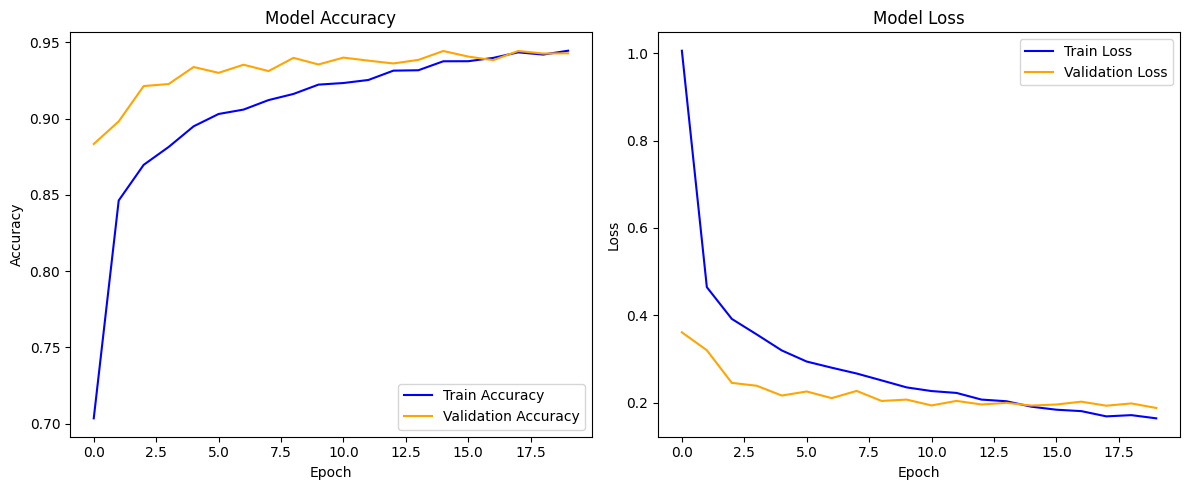

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

def getFourierConst(image, desired_length=1000):
    """
    Transforms a 2D image into a 1D Fourier-based feature vector of specified length.
    
    Parameters:
    - image: 2D numpy array representing the grayscale image.
    - desired_length: The length of the output feature vector (default is 1000).
    
    Returns:
    - features: 1D numpy array of length `desired_length`.
    """
    # Compute 2D FFT
    fft = np.fft.fft2(image)
    
    # Shift the zero-frequency component to the center
    fft_shift = np.fft.fftshift(fft)
    
    # Flatten the FFT result
    fft_flat = fft_shift.flatten()
    
    # Compute magnitude and phase
    magnitude = np.abs(fft_flat)
    phase = np.angle(fft_flat)
    
    # Combine magnitude and phase
    features = np.concatenate([magnitude, phase])
    
    # Adjust the feature vector to the desired length
    if len(features) > desired_length:
        features = features[:desired_length]
    elif len(features) < desired_length:
        features = np.pad(features, (0, desired_length - len(features)), 'constant')
    
    return features

# Load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalize the images to [0, 1]
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Apply getFourierConst to each image in the training set
train_features = np.array([getFourierConst(image) for image in train_X])

# Apply getFourierConst to each image in the testing set
test_features = np.array([getFourierConst(image) for image in test_X])

print(f"Transformed training data shape: {train_features.shape}")
print(f"Transformed testing data shape: {test_features.shape}")

# Define the MLP model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(1000,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_features, train_y,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_features, test_y, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [23]:
train_features.shape

(60000, 1000)